## HomeWork 7 
**PGE 379/383** | **Daniel McAllister-Ou**

Estimating skin of the damaged zone from a Hall Plot


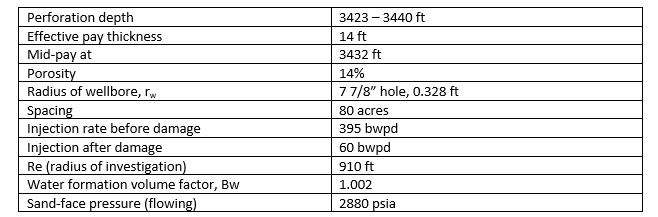


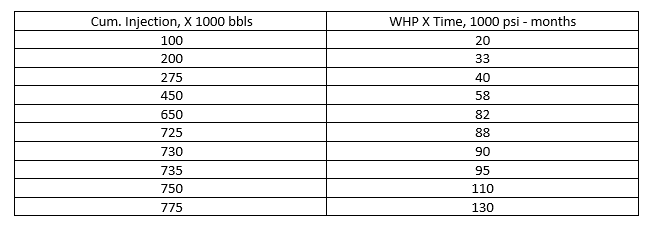

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Depths (ft)
perforation_depth_top = 3423
perforation_depth_bottom = 3440
mid_pay_depth = 3432

# Reservoir properties
effective_pay_thickness = 14          # ft
porosity = 0.14                       # fraction

# Wellbore properties
wellbore_radius = 0.328               # ft (7 7/8" hole)

# Drainage / spacing
spacing_acres = 80                    # acres
radius_of_investigation = 910         # ft

# Injection rates
injection_rate_before_damage = 395    # bwpd
injection_rate_after_damage = 60      # bwpd

# Fluid properties
water_formation_volume_factor = 1.002 # Bw

# Pressure
sandface_pressure_flowing = 2880      # psia



data = {
    "Cum_Injection_1000_bbls": [100, 200, 275, 450, 650, 725, 730, 735, 750, 775],
    "WHP_X_Time_1000psi_months": [20, 33, 40, 58, 82, 88, 90, 95, 110, 130]
}

hall_data = pd.DataFrame(data)
# hall_data['Sum WHP x Time'] = hall_data['WHP_X_Time_1000psi_months'].cumsum()
hall_data.head(10)

,Cum_Injection_1000_bbls,WHP_X_Time_1000psi_months
0,100,20
1,200,33
2,275,40
3,450,58
4,650,82
5,725,88
6,730,90
7,735,95
8,750,110
9,775,130


Lets plot our Hall Plot:

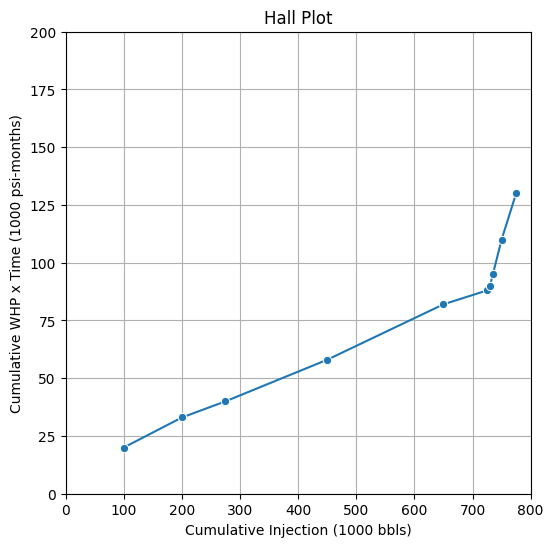

In [32]:
fig,ax = plt.subplots(figsize=(6,6))
sns.lineplot(data=hall_data, x="Cum_Injection_1000_bbls", y="WHP_X_Time_1000psi_months", marker='o', ax=ax)
ax.set_title('Hall Plot')
ax.set_xlabel('Cumulative Injection (1000 bbls)')
ax.set_ylabel('Cumulative WHP x Time (1000 psi-months)')
ax.set_xlim(0, 800)
ax.set_ylim(0, 200)
# ax.set_aspect('equal')
plt.grid()
plt.show()

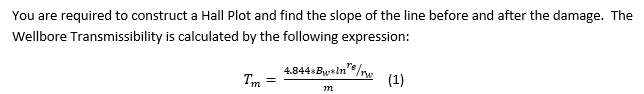

In [33]:
hall_data['Cum Injection'] = hall_data['Cum_Injection_1000_bbls'] * 1000
hall_data['WHP x Time'] = hall_data['WHP_X_Time_1000psi_months'] * 1000
before_damage_hall_data = hall_data[hall_data['Cum_Injection_1000_bbls'] <= 651]
after_damage_hall_data = hall_data[hall_data['Cum_Injection_1000_bbls'] > 651]

# Linear regression for before damage 
#  x="Cum_Injection_1000_bbls", y="WHP_X_Time_1000psi_months"
# slope, intercept = np.polyfit(before_damage_hall_data['Cum_Injection_1000_bbls'], before_damage_hall_data['WHP_X_Time_1000psi_months'], 1)
slope, intercept = np.polyfit(before_damage_hall_data['Cum Injection'], before_damage_hall_data['WHP x Time'], 1)
print(f"Before Damage - Slope: {slope:.2f}")

Tm = 4.844 * water_formation_volume_factor * np.log(radius_of_investigation/wellbore_radius) / slope 
print(f"Estimated Before Damage Wellbore Transmissibility (Tm): {Tm:.2f} ")


Before Damage - Slope: 0.11
Estimated Before Damage Wellbore Transmissibility (Tm): 348.16 


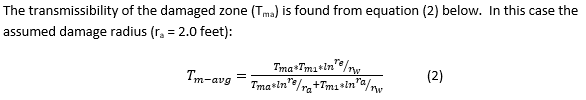

In [34]:
# slope_dmg, intercept_dmg = np.polyfit(after_damage_hall_data['Cum_Injection_1000_bbls'], after_damage_hall_data['WHP_X_Time_1000psi_months'], 1)
slope_dmg, intercept_dmg = np.polyfit(after_damage_hall_data['Cum Injection'], after_damage_hall_data['WHP x Time'], 1)
print(f"After Damage - Slope: {slope_dmg:.2f}")

Tm_dmg = 4.844 * water_formation_volume_factor * np.log(radius_of_investigation/wellbore_radius) / slope_dmg 
print(f"Estimated After Damage Wellbore Transmissibility (Tm_dmg/Tmavg): {Tm_dmg:.2f} ")

Tm1 = Tm
Tmavg = Tm_dmg
ra = 2 # ft

def solve_Tma(Tmavg, Tm1, radius_of_investigation, wellbore_radius, ra):
    A = np.log(radius_of_investigation / wellbore_radius)
    B = np.log(radius_of_investigation / ra)
    C = np.log(ra / wellbore_radius)
    
    denominator = Tm1 * A - Tmavg * B
    
    if np.any(np.isclose(denominator, 0)):
        raise ValueError("Denominator is zero or near zero — solution is unstable.")
    
    Tma = (Tmavg * Tm1 * C) / denominator
    return Tma

Tma = solve_Tma(Tmavg, Tm1, radius_of_investigation, wellbore_radius, ra)
print(f"Estimated Damaged Zone Transmissibility (Tma): {Tma:.2f} ")

After Damage - Slope: 0.87
Estimated After Damage Wellbore Transmissibility (Tm_dmg/Tmavg): 44.30 
Estimated Damaged Zone Transmissibility (Tma): 11.20 


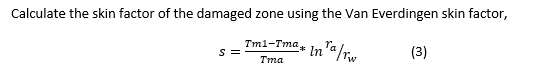

In [35]:
Skin = (Tm1 - Tma) / Tma * np.log(ra/wellbore_radius)
print(f"Estimated Skin Factor: {Skin:.2f} ")

Estimated Skin Factor: 54.38 
